In [1]:
import numpy as np
import matplotlib.pyplot as plt

from planar_utils import *

In [2]:
np.random.seed(1)

In [3]:
X, y = load_data()

In [4]:
print(f'Shape of X = {X.shape}')
print(f'Shape of y = {y.shape}')

Shape of X = (2, 400)
Shape of y = (1, 400)


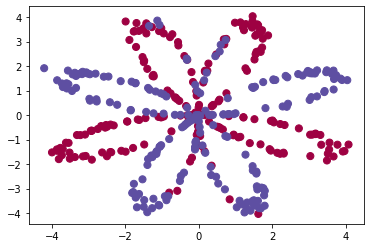

In [5]:
plot_planar_data(X, y)

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def relu(z):
    return z * (z > 0)

In [8]:
def relu_derivative(z):
    return 1 * (z > 0)

In [9]:
hidden_neurons = 4
epochs = 10000
m = X.shape[1]
learning_rate = 1.2
cost = [0]*epochs

In [10]:
W1 = np.random.randn(hidden_neurons, X.shape[0])*0.01
b1 = np.zeros((hidden_neurons, 1)) 
W2 = np.random.randn(y.shape[0], hidden_neurons)*0.01
b2 = np.zeros((y.shape[0], 1))

In [12]:
for epoch in range(epochs):
    
    # forward prop
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    # cost 
    logprobs = np.multiply(np.log(A2), y) + np.multiply((1 - y), np.log(1 - A2))
    cost[epoch] = - np.sum(logprobs) / m
    if epoch%1000 == 0:
        print(f'Cost after {epoch} iterations = {cost[epoch]}')
    
    # backward prop
    dZ2= A2 - y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    # updating the parameters
    W2 -= learning_rate*dW2
    b2 -= learning_rate*db2
    W1 -= learning_rate*dW1
    b1 -= learning_rate*db1

Cost after 0 iterations = 0.6931125167719423
Cost after 1000 iterations = 0.28257810627095964
Cost after 2000 iterations = 0.26977714894121974
Cost after 3000 iterations = 0.26231806209753844
Cost after 4000 iterations = 0.24122763763977184
Cost after 5000 iterations = 0.22602306763242705
Cost after 6000 iterations = 0.22162096031401776
Cost after 7000 iterations = 0.21890721724721857
Cost after 8000 iterations = 0.216884894610155
Cost after 9000 iterations = 0.21525972814605293


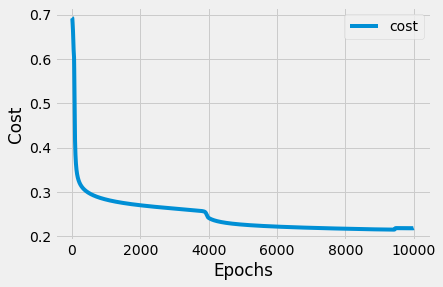

In [13]:
plt.style.use('fivethirtyeight')
        
plt.plot(cost, label = 'cost')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [14]:
Z1 = np.dot(W1, X) + b1
A1 = np.tanh(Z1)

Z2 = np.dot(W2, A1) + b2
y_pred = sigmoid(Z2)

In [15]:
print ('Accuracy: %d' % float((np.dot(y, y_pred.T) + np.dot(1-y, 1-y_pred.T))/float(y.size)*100) + '%')

Accuracy: 85%
